**Group Notebook**

The metric we have chosen for this project is the healthiest neighborhood in Pittsburgh in order to decide who will be recruited to a utopian society on Neptune. In order to do this, we have decided to focus on the physical activity of individuals in neighborhoods in Pittsburgh. We will be looking at playgrounds, courts and rinks, and the amount of stairs per neighborhood.

In [4]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

**Imaan:** Playgrounds

The metric I am focusing on is playgrounds per neighborhood. In theory, the more playgrounds per neighborhood, the more children will be outside engaging in physcial activity, and the more times children are engaging in physical activity, the more healthier they will be. The dataset I will be using for this then will be playgrounds per neighborhood.

Text(0, 0.5, 'Number of Playgrounds')

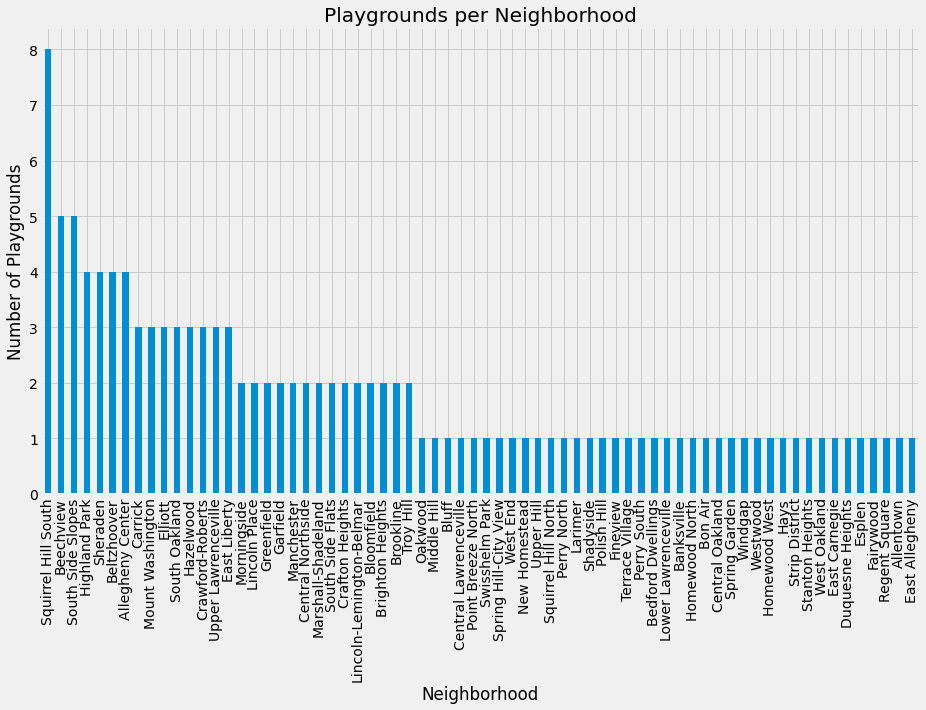

In [5]:
pg=pd.read_csv("playgrounds.tsv", sep='\t')
pg['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Playgrounds per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Playgrounds")

By this analysis, I can conclude that the neighborhood with the most parks is Squirrel Hill North with eight parks. Thus, by the metric described earlier, this would be the healthiest neighborhood by this dataset. While the amount of children per neighborhood may vary, because Squirrel Hill North has such a large margin over the other neighborhoods, it is safe to say that it is the healthiest neighborhood in terms of physical activity in children.

**Jeremy:** Courts and Rinks

The following analysis of dataset "courts_and_rinks" will determine which neighborhood has the most of those type of facility. Access to facilites is essential to promiting an overall healty lifestyle.

Text(0, 0.5, 'Number of Courts and Rinks')

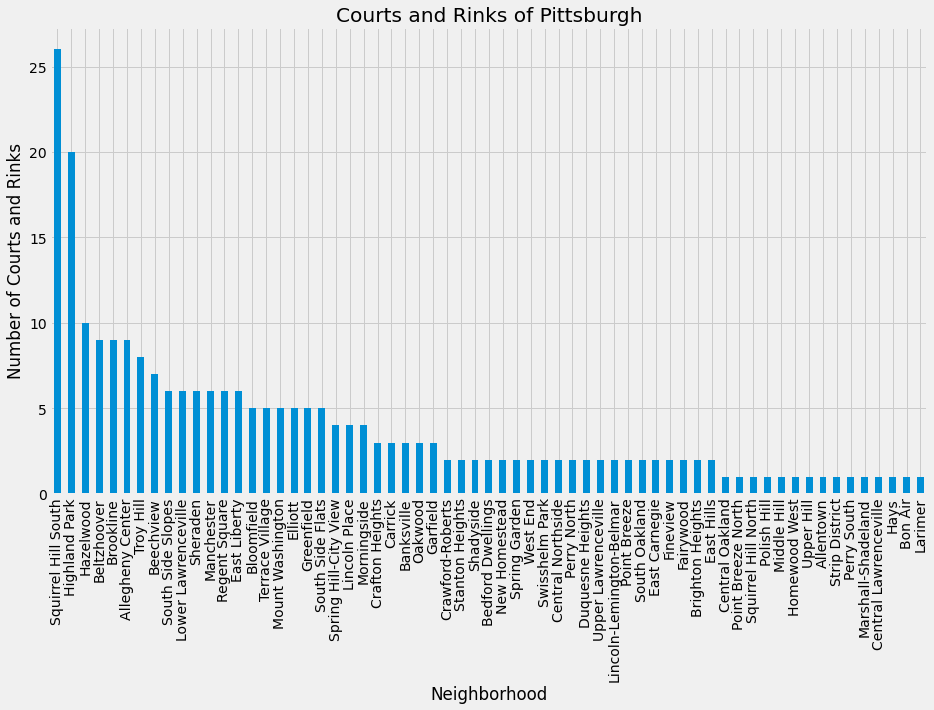

In [6]:
df = pd.read_csv("courts_and_rinks.csv")
df['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Courts and Rinks of Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Courts and Rinks")

- Squirrel Hill South is a clear winner with 26 different court or rink facilities.
- The folowing code will merge the data set with a map of Pittsburgh's neighborhoods. And the heatmap will indicate which neighborhood is Squirll Hill.

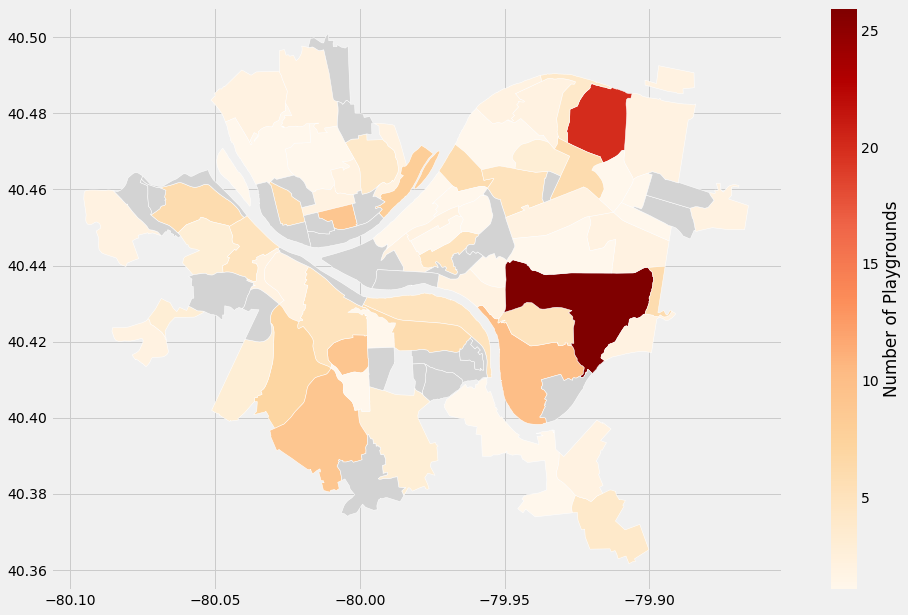

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
pr_counts1 = df.groupby("neighborhood").count()
pr_counts2 = pr_counts1.groupby("neighborhood").sum()
parks_map = neighborhoods.merge(pr_counts2, how='left', left_on='hood', right_on='neighborhood')
parks_map.plot(column='park', 
               cmap='OrRd',              
               edgecolor="white",        
               legend=True,             
               legend_kwds={'label': "Number of Playgrounds"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"}
               )

So far, it seems like the group's winner for Best Neighborhood in the City of Pittsburgh is Squirrel Hill. Whether you are in the north or the south you will have easy access to health promoting facilities. The younger generations will have numerous playgrounds, and the teenager and up will have ample opportunities to get real good at tennis, basketball or ice skating in Pittsburgh's long winters.

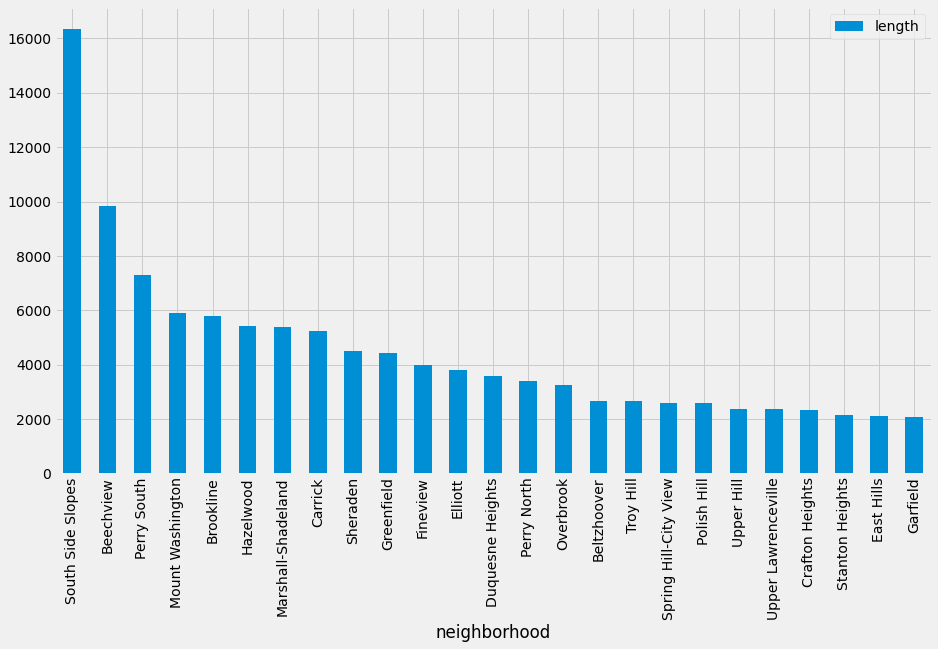

In [9]:
stairs = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64")
stairs_by_length = stairs.loc[:,["neighborhood", "length"]].groupby("neighborhood").sum()
top_five = stairs_by_length.sort_values(by = "length", ascending = False)[0:25]
top_five.plot(kind = "bar", figsize=(14,8))

Imaan's top 3: Squirrel Hill South, Beechview, South Side Slopes

Jeremy's top 3: Squirrel Hill South, Highland Park, Hazelwood

Sodi's top 3: South Side Slopes, Beechview, Perry South

**Group Winner**
Unfortunately, it looks like Squirrel Hill, while substantially ahead in terms of the amount of fitness centers, is relatively lacking in terms of natural slopes, and hence stairs. Thus, we might be led to believe that while it may offer the most opportunites, only those who take advantage of those opportunities will be physically fit. Thus, our random selection might select a member there who doesn't take advantage of all the rinks and courts, and even who didn't use the playgrounds as a child, and thus our immensely important mission will fail.
Conversely, a citizen of a neighborhood that has a lot of grade (and thus a lot of stairs), will be forced to participate in thier use, and that might even make them more inclined to take advantage of the other resources! Coincidentally, Beechwood seems to rank fairly highly on everyone's list, meaning it may have the best balance of these features, and thus be home to the next citizens of Neptune!!!
